## 1. 데이터 다운로드

In [1]:
# pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="elQT5zGw4Bx2KVZNdJzv")
project = rf.workspace("project-5bqgf").project("wanted-project-gpfqc")
version = project.version(1)
dataset = version.download("yolov11")                

loading Roboflow workspace...
loading Roboflow project...


In [2]:
# labels 
# 1     | 0.4828125           | 0.6078125           | 0.915625 | 0.76328125
# class | box의 x center(비율) | box의 y center(비율) | width비율 | height비율 

## 2. 데이터 형태 파악

In [3]:
# 디스코드
label = 1 
box = [0.328125, 0.50078125, 0.33359375, 0.7171875]

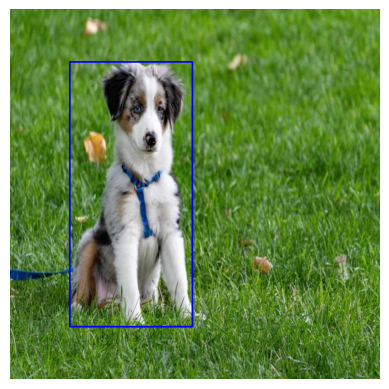

In [4]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread("./dog_test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape

wc, hc, w, h = box
wc, hc, w, h = wc * width, hc * height, w * width, h * height

x1 = int(wc - w / 2)
y1 = int(hc - h / 2)
w = int(w)
h = int(h)

cv2.rectangle(image, (x1, y1, w, h), (0, 0, 255), 2)

plt.imshow(image)
plt.axis("off")
plt.show()

## 3. 모델 불러오기 및 학습

In [5]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [6]:
import os 
os.getcwd()

'c:\\wanted\\OpenCV_project'

In [7]:
# data.yaml의 위치 경로 작성
data_path = "C:/wanted/OpenCV_project/Wanted-project-1/data.yaml"

# 모델 학습
model.train(data=data_path, epochs=300, imgsz=640, batch=8)

New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.77  Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/wanted/OpenCV_project/Wanted-project-1/data.yaml, epochs=300, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\wanted\OpenCV_project\Wanted-project-1\train\labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
INFO:albumentations.check_version:A new version of Albumentations is available: 2.0.4 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\wanted\OpenCV_project\Wanted-project-1\valid\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      1.12G     0.8169      3.028      1.296         17        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all          4          7    0.00575          1      0.178      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      1.15G     0.7323      2.955        1.1         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.01it/s]

                   all          4          7    0.00565          1      0.175      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      1.15G     0.9222      2.974      1.376         26        640: 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all          4          7    0.00568          1      0.235      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      1.15G     0.6869      3.002      1.143         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.05it/s]

                   all          4          7     0.0056          1      0.397       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      1.16G     0.8743      2.835      1.317         19        640: 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.66it/s]

                   all          4          7    0.00561          1      0.389      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      1.15G     0.8401      2.863       1.27         23        640: 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.83it/s]

                   all          4          7    0.00417        0.8      0.267      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      1.15G     0.7688      2.916      1.341         11        640: 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          4          7    0.00425        0.8      0.359       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      1.15G     0.8711      2.835      1.308         26        640: 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.60it/s]

                   all          4          7    0.00441        0.8       0.31      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      1.15G     0.7313      2.727      1.212         21        640: 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.17it/s]

                   all          4          7    0.00465        0.8      0.312      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      1.16G     0.6911      2.625      1.236         16        640: 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.93it/s]

                   all          4          7    0.00484        0.8      0.346      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      1.16G     0.6957      2.647      1.212         13        640: 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          4          7    0.00495        0.8      0.387      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      1.16G      0.925      2.662      1.347         18        640: 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.62it/s]

                   all          4          7    0.00495        0.8      0.387      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      1.16G     0.7324      2.456       1.28         20        640: 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all          4          7    0.00515        0.8      0.416      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      1.16G     0.9082      2.379      1.365         18        640: 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          4          7    0.00564        0.9      0.395      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      1.15G     0.9174        2.4      1.353         12        640: 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.54it/s]

                   all          4          7    0.00564        0.9      0.395      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      1.16G     0.8806       2.44       1.35         16        640: 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.91it/s]

                   all          4          7    0.00601          1      0.562      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      1.16G     0.7887      2.303      1.273         16        640: 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all          4          7    0.00583          1      0.576      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      1.16G     0.8773      2.239      1.297         20        640: 100%|██████████| 2/2 [00:00<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.78it/s]

                   all          4          7    0.00583          1      0.576      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      1.16G     0.8165      2.321      1.258         18        640: 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.78it/s]

                   all          4          7    0.00565          1      0.542      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      1.15G     0.9763      2.248      1.398         20        640: 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]

                   all          4          7    0.00565          1      0.542      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      1.16G     0.6116      2.103      1.156         14        640: 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]

                   all          4          7    0.00577          1      0.598      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      1.15G     0.9126      2.092       1.39         17        640: 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]

                   all          4          7    0.00577          1      0.598      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      1.16G     0.8402      2.018      1.245         11        640: 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.70it/s]


                   all          4          7    0.00576          1      0.747      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      1.15G     0.7991      1.952      1.244         19        640: 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.71it/s]

                   all          4          7    0.00576          1      0.747      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      1.16G     0.8438       2.01       1.26         16        640: 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]


                   all          4          7    0.00588          1      0.731      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      1.15G     0.9552      2.067       1.39         17        640: 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.64it/s]

                   all          4          7    0.00588          1      0.731      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      1.16G     0.7462      1.805      1.165         24        640: 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.67it/s]

                   all          4          7    0.00588          1      0.731      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      1.16G     0.9943       1.89      1.332         21        640: 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.56it/s]

                   all          4          7    0.00444       0.75      0.688      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      1.16G      1.081      2.164      1.669         13        640: 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.34it/s]


                   all          4          7    0.00444       0.75      0.688      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      1.16G     0.8937      1.879       1.37         16        640: 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.82it/s]

                   all          4          7    0.00443       0.75      0.631      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      1.16G     0.9877      1.749      1.392         17        640: 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          4          7    0.00443       0.75      0.631      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      1.16G     0.7419      1.664      1.209         18        640: 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          4          7    0.00443       0.75      0.631      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      1.16G      1.179      2.192      1.729         14        640: 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.31it/s]

                   all          4          7    0.00456       0.75      0.409      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      1.16G     0.9022      1.892      1.239         28        640: 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          4          7    0.00456       0.75      0.409      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      1.16G      1.164      1.865      1.453         26        640: 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          4          7    0.00456       0.75      0.409      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      1.16G     0.8957      1.768      1.372         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]

                   all          4          7    0.00452       0.75        0.4      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      1.16G     0.9496       1.71      1.375         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.22it/s]

                   all          4          7    0.00452       0.75        0.4      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      1.16G     0.9198      1.519      1.363         26        640: 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.95it/s]

                   all          4          7    0.00452       0.75        0.4      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      1.16G     0.8301      1.617      1.306         22        640: 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.90it/s]

                   all          4          7    0.00443       0.75      0.331       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      1.16G     0.8513      1.531      1.229         21        640: 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.35it/s]

                   all          4          7    0.00443       0.75      0.331       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      1.16G      0.881      1.695      1.302         22        640: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          4          7    0.00443       0.75      0.331       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      1.16G     0.9544      1.858      1.402         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all          4          7      0.463       0.35      0.315     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      1.15G     0.7427      1.322      1.236         20        640: 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          4          7      0.463       0.35      0.315     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      1.16G      0.746      1.485      1.136         16        640: 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.41it/s]

                   all          4          7      0.463       0.35      0.315     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      1.16G     0.9127      1.477      1.392         21        640: 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all          4          7      0.463       0.35      0.315     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      1.16G     0.8597       1.43      1.393         19        640: 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          4          7      0.596       0.35       0.27     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      1.16G     0.6489      1.413      1.168         11        640: 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all          4          7      0.596       0.35       0.27     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      1.16G     0.8495      1.699      1.405         16        640: 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          4          7      0.596       0.35       0.27     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      1.16G     0.8777      1.451      1.264         21        640: 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          4          7      0.596       0.35       0.27     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      1.16G     0.9143      1.451      1.223         16        640: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all          4          7      0.629       0.35      0.293      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      1.16G     0.9362      1.323      1.402         22        640: 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.22it/s]

                   all          4          7      0.629       0.35      0.293      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      1.16G     0.7202      1.456      1.239         14        640: 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          4          7      0.629       0.35      0.293      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      1.16G     0.7607      1.323      1.268         26        640: 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.59it/s]

                   all          4          7      0.629       0.35      0.293      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      1.16G     0.8039      1.454      1.363         18        640: 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          4          7      0.465      0.328      0.271      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      1.16G     0.9217      1.479      1.352         18        640: 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          4          7      0.465      0.328      0.271      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      1.16G     0.7733      1.395      1.296         14        640: 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]

                   all          4          7      0.465      0.328      0.271      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      1.16G     0.9505      1.603      1.382         16        640: 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]


                   all          4          7      0.465      0.328      0.271      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      1.16G     0.8327      1.417      1.296         20        640: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          4          7       0.52      0.431      0.284      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      1.16G     0.7464      1.251      1.195         21        640: 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.78it/s]

                   all          4          7       0.52      0.431      0.284      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      1.16G     0.8391        1.4      1.234         20        640: 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all          4          7       0.52      0.431      0.284      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      1.16G     0.7197      1.293      1.277         18        640: 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.14it/s]

                   all          4          7       0.52      0.431      0.284      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      1.16G     0.8828      1.688      1.302         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.60it/s]

                   all          4          7        0.5      0.185      0.415      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      1.16G     0.9051       1.42      1.295         17        640: 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]

                   all          4          7        0.5      0.185      0.415      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      1.16G     0.7377      1.522      1.245         12        640: 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          4          7        0.5      0.185      0.415      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      1.16G     0.7772      1.262      1.168         28        640: 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]

                   all          4          7        0.5      0.185      0.415      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      1.16G     0.6684      1.219      1.115         23        640: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.14it/s]

                   all          4          7      0.506      0.432       0.38      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      1.16G     0.8747      1.165      1.303         22        640: 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all          4          7      0.506      0.432       0.38      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      1.16G     0.7623      1.354      1.187         25        640: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          4          7      0.506      0.432       0.38      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      1.16G     0.7796      1.271      1.194         19        640: 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all          4          7      0.506      0.432       0.38      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      1.16G     0.8974      1.416      1.248         15        640: 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]

                   all          4          7      0.506      0.441      0.392       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      1.16G     0.8762      1.285      1.355         24        640: 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.25it/s]

                   all          4          7      0.506      0.441      0.392       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      1.16G     0.7557      1.107      1.184         20        640: 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          4          7      0.506      0.441      0.392       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      1.16G     0.6899      1.304      1.154         14        640: 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]

                   all          4          7      0.506      0.441      0.392       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      1.16G     0.8849      1.295      1.345         14        640: 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.32it/s]

                   all          4          7      0.516      0.439      0.358      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      1.16G     0.7047      1.245      1.156         21        640: 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.50it/s]

                   all          4          7      0.516      0.439      0.358      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      1.16G      0.761      1.711      1.307          8        640: 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]

                   all          4          7      0.516      0.439      0.358      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      1.16G     0.6999      1.315      1.177         20        640: 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.68it/s]

                   all          4          7      0.516      0.439      0.358      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      1.16G     0.6249      1.167      1.141         17        640: 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          4          7      0.595       0.35      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      1.16G      1.001      1.371      1.322         21        640: 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.76it/s]

                   all          4          7      0.595       0.35      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      1.16G     0.7428      1.157      1.189         18        640: 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.14it/s]

                   all          4          7      0.595       0.35      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      1.16G     0.6526      1.045      1.128         19        640: 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          4          7      0.595       0.35      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      1.16G      0.753       1.36      1.181         15        640: 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.03it/s]

                   all          4          7      0.309      0.436      0.229      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      1.16G     0.7832       1.29      1.152         19        640: 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          4          7      0.309      0.436      0.229      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      1.16G     0.6726      1.488      1.236         15        640: 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          4          7      0.309      0.436      0.229      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      1.16G     0.6593      1.146      1.194         16        640: 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

                   all          4          7      0.309      0.436      0.229      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      1.16G     0.7398      1.352      1.293         19        640: 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all          4          7      0.507       0.35      0.402      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      1.16G     0.6255       1.36      1.138         11        640: 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]

                   all          4          7      0.507       0.35      0.402      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      1.16G     0.7283      1.053      1.146         19        640: 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.70it/s]

                   all          4          7      0.507       0.35      0.402      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      1.16G     0.9728      1.238      1.424         15        640: 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.09it/s]


                   all          4          7      0.507       0.35      0.402      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      1.16G     0.7562       1.28      1.171         17        640: 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.23it/s]

                   all          4          7      0.813       0.25      0.325      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      1.16G     0.7938       1.42       1.32         14        640: 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.82it/s]

                   all          4          7      0.813       0.25      0.325      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      1.16G     0.5617      1.201      1.042         13        640: 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.92it/s]

                   all          4          7      0.813       0.25      0.325      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      1.16G     0.6588      1.056      1.166         19        640: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

                   all          4          7      0.813       0.25      0.325      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      1.16G     0.6388       1.14      1.119         15        640: 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]

                   all          4          7      0.568       0.35      0.393      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      1.16G     0.7273      1.166      1.213         22        640: 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          4          7      0.568       0.35      0.393      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      1.16G     0.6859      1.047      1.183         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          4          7      0.568       0.35      0.393      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      1.16G     0.5964      1.036      1.073         26        640: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.79it/s]

                   all          4          7      0.568       0.35      0.393      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      1.16G     0.8126      1.267      1.266         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]

                   all          4          7      0.516        0.6      0.428      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      1.16G     0.8164      1.249      1.352         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          4          7      0.516        0.6      0.428      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      1.16G      0.759      1.139      1.172         20        640: 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all          4          7      0.516        0.6      0.428      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      1.16G     0.7044      1.104      1.182         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all          4          7      0.516        0.6      0.428      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      1.16G      0.741      1.294      1.224         14        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all          4          7      0.543        0.6      0.259      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      1.16G     0.5538     0.9659      1.051         17        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          4          7      0.543        0.6      0.259      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      1.16G     0.7929      1.117       1.21         21        640: 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all          4          7      0.543        0.6      0.259      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      1.16G     0.7306     0.9824      1.199         27        640: 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]

                   all          4          7      0.543        0.6      0.259      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      1.16G     0.6847     0.9919      1.171         16        640: 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all          4          7      0.719       0.25      0.283      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      1.16G     0.7151      1.064      1.176         25        640: 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]

                   all          4          7      0.719       0.25      0.283      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      1.16G     0.6033     0.9376      1.101         15        640: 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.05it/s]

                   all          4          7      0.719       0.25      0.283      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      1.16G     0.7302      1.006        1.2         18        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          4          7      0.719       0.25      0.283      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      1.16G     0.7806      1.163      1.208         17        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all          4          7       0.71       0.25      0.272      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      1.16G      0.609     0.9441      1.101         13        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          4          7       0.71       0.25      0.272      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      1.16G     0.6225      1.057      1.105         16        640: 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all          4          7       0.71       0.25      0.272      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      1.16G     0.6369      1.012       1.11         28        640: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.91it/s]

                   all          4          7       0.71       0.25      0.272      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      1.16G     0.7723      1.093      1.328         12        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          4          7      0.632       0.25      0.241      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      1.16G     0.6661      1.389      1.222          9        640: 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.87it/s]

                   all          4          7      0.632       0.25      0.241      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      1.16G     0.6769      1.002      1.203         14        640: 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          4          7      0.632       0.25      0.241      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      1.16G     0.6745      1.127      1.184         19        640: 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all          4          7      0.632       0.25      0.241      0.136
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



117 epochs completed in 0.034 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 5.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.77  Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.83it/s]


                   all          4          7    0.00582          1      0.573      0.419
                   cat          1          2     0.0058          1      0.586      0.546
                   dog          3          5    0.00585          1       0.56      0.292
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000029159B11110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

## 4. 예측

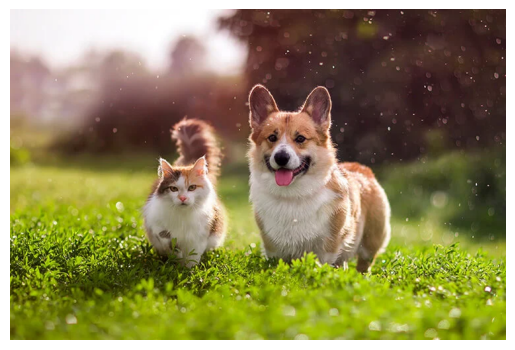

In [8]:
from PIL import Image 

new_image = Image.open("./yolo_catdog.webp").convert("RGB")

plt.imshow(new_image)
plt.axis("off")
plt.show()

In [9]:
# 모델 불러오기 
import torch 
model_path = "C:/wanted/OpenCV_project/runs/detect/train3/weights/best.pt"
model = YOLO(model_path)

In [10]:
import numpy as np

# new_image = cv2.resize(image, (640,640))
results = model(new_image)


0: 448x640 1 cat, 63.2ms
Speed: 2.7ms preprocess, 63.2ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 640)


In [11]:
cls_dict = results[0].names
cls_dict

{0: 'cat', 1: 'dog'}

In [12]:
cls_result = results[0].boxes.cls
cls_result

tensor([0.], device='cuda:0')

In [13]:
result_text = cls_dict[cls_result.item()]
result_text

'cat'

In [14]:
results[0].boxes.xyxy

tensor([[192.8621, 162.6436, 332.5916, 382.7296]], device='cuda:0')

192 162 332 382


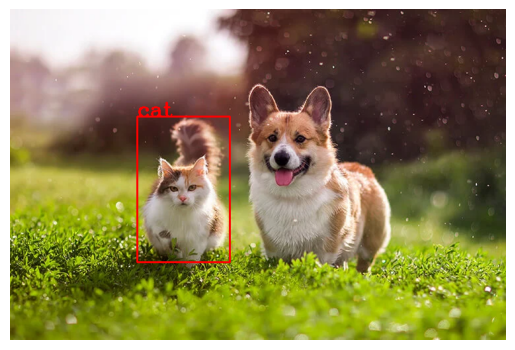

In [15]:
from PIL import Image 

new_image = Image.open("./yolo_catdog.webp").convert("RGB")
new_image_np = np.array(new_image)

x1, y1, x2, y2 = results[0].boxes.xyxy[0]
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
print(x1, y1, x2, y2)

cv2.rectangle(new_image_np, (x1,y1), (x2,y2), (255,0,0), 2)
cv2.putText(new_image_np, result_text, (x1,y1), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)

plt.imshow(new_image_np)
plt.axis("off")
plt.show()